In [101]:
import matplotlib.pyplot as plt
from copy import deepcopy
import time

In [102]:
class Cell:
    def __init__(self, value):
        self.value = value

class Map(Cell):
    def __init__(self):
        self.size = 0
        self.map_array = []
    
    def readInput(self, filename):
        with open(filename, 'r') as file:
            lines = file.readlines()
            for line in lines:
                row = line.strip().split(',')
                row_values = []
                for value in row:
                    if (value.strip() == '_'):
                        val = Cell(True)
                        row_values.append(val)
                    else:
                        val = Cell(value.strip())
                        row_values.append(val)
                self.map_array.append(row_values)
        
            self.size = len(self.map_array)
    

    def printMap(self):
        # Tạo figure và axes
        fig, ax = plt.subplots()

        fig.set_size_inches(10, 10)

        # Vẽ các ô vuông
        for i in range(0, self.size):
            for j in range(0, self.size):
                if (self.map_array[i][j].value == None):
                    color = "purple"
                elif (self.map_array[i][j].value == "T"):
                    color = "red"
                elif (self.map_array[i][j].value == "G"):
                    color = "gold"
                else:
                    color = "navajowhite"
                rect = plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor="black")
                ax.add_patch(rect)
                # Ghi giá trị vào ô vuông
                ax.text(j + 0.5, i + 0.5, (self.map_array[i][j].value), ha="center", va="center", fontsize=10)

    

        # Loại bỏ các trục số
        ax.set_xticks([])
        ax.set_yticks([])

        # Cài đặt giới hạn trục
        ax.set_xlim(0, self.size)
        ax.set_ylim(self.size, 0)

        # Hiển thị ma trận
        plt.show()
    
    def show_result_of_brute_force(self, running_time):
        # Tạo figure và axes
        fig, ax = plt.subplots()
        fig.set_size_inches(10, 10)

        # Vẽ các ô vuông
        for i in range(0, self.size):
            for j in range(0, self.size):
                if (self.map_array[i][j].value == None):
                    color = "purple"
                elif (self.map_array[i][j].value == "T"):
                    color = "red"
                elif (self.map_array[i][j].value == "G"):
                    color = "gold"
                else:
                    color = "navajowhite"
                rect = plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor="black")
                ax.add_patch(rect)
                # Ghi giá trị vào ô vuông
                ax.text(j + 0.5, i + 0.5, (self.map_array[i][j].value), ha="center", va="center", fontsize=10)

        # Add title
        title = f'Brute Force Algorithm Result\nRunning time: {running_time:.5f} seconds'
        ax.set_title(title)

        # Loại bỏ các trục số
        ax.set_xticks([])
        ax.set_yticks([])

        # Cài đặt giới hạn trục
        ax.set_xlim(0, self.size)
        ax.set_ylim(self.size, 0)

        # Hiển thị ma trận
        plt.show()

    
    def show_result_of_backtracking(self, running_time):
        # Tạo figure và axes
        fig, ax = plt.subplots()

        fig.set_size_inches(10, 10)

        # Vẽ các ô vuông
        for i in range(0, self.size):
            for j in range(0, self.size):
                if (self.map_array[i][j].value == None):
                    color = "purple"
                elif (self.map_array[i][j].value == "T"):
                    color = "red"
                elif (self.map_array[i][j].value == "G"):
                    color = "gold"

                else:
                    color = "navajowhite"
                rect = plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor="black")
                ax.add_patch(rect)
                # Ghi giá trị vào ô vuông
                ax.text(j + 0.5, i + 0.5, (self.map_array[i][j].value), ha="center", va="center", fontsize=10)

        # Add title
        title = f'Backtracking Algorithm Result\nRunning time: {running_time:.5f} seconds'
        ax.set_title(title)

        # Loại bỏ các trục số
        ax.set_xticks([])
        ax.set_yticks([])

        # Cài đặt giới hạn trục
        ax.set_xlim(0, self.size)
        ax.set_ylim(self.size, 0)

        # Hiển thị ma trận
        plt.show()

In [103]:
def convert_numeric_strings_to_integers(map):
    for row in map.map_array:
        for cell in row:
            if isinstance(cell.value, str) and cell.value.isdigit():
                cell.value = int(cell.value)
    

def convert_true_to_none(map):
    for row in map.map_array:
        for cell in row:
            if type(cell.value) is bool:
                cell.value = None
            
def solve_map_with_brute_force(map):
    copied_map = deepcopy(map)
    size = copied_map.size

    start_time = time.time()
    
    def is_configuration_valid(configuration):
        # Check if the configuration satisfies all constraints
        for i in range(size):
            for j in range(size):
                cell = copied_map.map_array[i][j]
                if cell.value is not None:
                    count_traps = sum(1 for ni, nj in get_neighbors(i, j) if configuration[ni][nj] == 'T')
                    if cell.value != count_traps:
                        return False
        return True
    
    def generate_possible_configurations(configuration, index):
        if index == size * size:
            return is_configuration_valid(configuration)
        
        i, j = divmod(index, size)
        
        if copied_map.map_array[i][j].value is None:
            configuration[i][j] = 'T'
            if generate_possible_configurations(configuration, index + 1):
                return True
            configuration[i][j] = 'G'
            if generate_possible_configurations(configuration, index + 1):
                return True
            return False
        else:
            return generate_possible_configurations(configuration, index + 1)
    
    def get_neighbors(i, j):
        for ni in range(max(0, i-1), min(size, i+2)):
            for nj in range(max(0, j-1), min(size, j+2)):
                if ni != i or nj != j:
                    yield ni, nj
    
    initial_configuration = [[copied_map.map_array[i][j].value for i in range(size)] for j in range(size)]
    
    result = generate_possible_configurations(initial_configuration, 0)
    
    end_time = time.time()  
    
    if result:
        for i in range(size):
            for j in range(size):
                if initial_configuration[i][j] == "T":
                    copied_map.map_array[i][j].value = "T"
                elif initial_configuration[i][j] == "G":
                    copied_map.map_array[i][j].value = "G"
                else:
                    copied_map.map_array[i][j].value = int(copied_map.map_array[i][j].value)
        copied_map.show_result_of_brute_force(end_time - start_time)
        
    else:
        print("No solution found.")

In [104]:
def solve_map_with_backtracking(map):
    copied_map = deepcopy(map)
    size = copied_map.size
    
    start_time = time.time()  # Record the start time
    
    def is_configuration_valid(configuration):
        # Check if the configuration satisfies all constraints
        for i in range(size):
            for j in range(size):
                cell = copied_map.map_array[i][j]
                if cell.value is not None:
                    count_traps = sum(1 for ni, nj in get_neighbors(i, j) if configuration[ni][nj] == 'T')
                    if cell.value != count_traps:
                        return False
        return True
    
    def generate_configurations(configuration, index):
        if index == size * size:
            return is_configuration_valid(configuration)
        
        i, j = divmod(index, size)
        
        if copied_map.map_array[i][j].value is None:
            for value in ['T', 'G']:
                configuration[i][j] = value
                if generate_configurations(configuration, index + 1):
                    return True
            return False
        else:
            return generate_configurations(configuration, index + 1)
    
    def get_neighbors(i, j):
        for ni in range(max(0, i-1), min(size, i+2)):
            for nj in range(max(0, j-1), min(size, j+2)):
                if ni != i or nj != j:
                    yield ni, nj
    
    initial_configuration = [[copied_map.map_array[i][j].value for i in range(size)] for j in range(size)]
    
    # Generate configurations recursively
    result = generate_configurations(initial_configuration, 0)
    
    end_time = time.time()  # Record the end time
    
    if result:
        for i in range(size):
            for j in range(size):
                if initial_configuration[i][j] == 'T':
                    copied_map.map_array[i][j].value = "T"
                elif initial_configuration[i][j] == 'G':
                    copied_map.map_array[i][j].value = "G"
                else:
                    copied_map.map_array[i][j].value = copied_map.map_array[i][j].value
        copied_map.show_result_of_backtracking(end_time - start_time)  
    else:
        print("No solution found.")

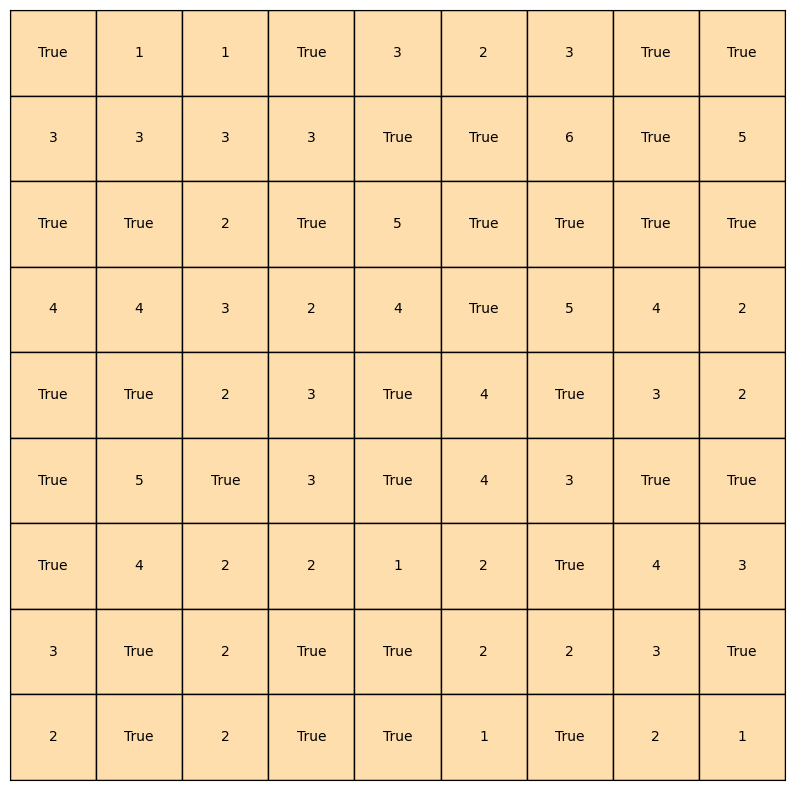

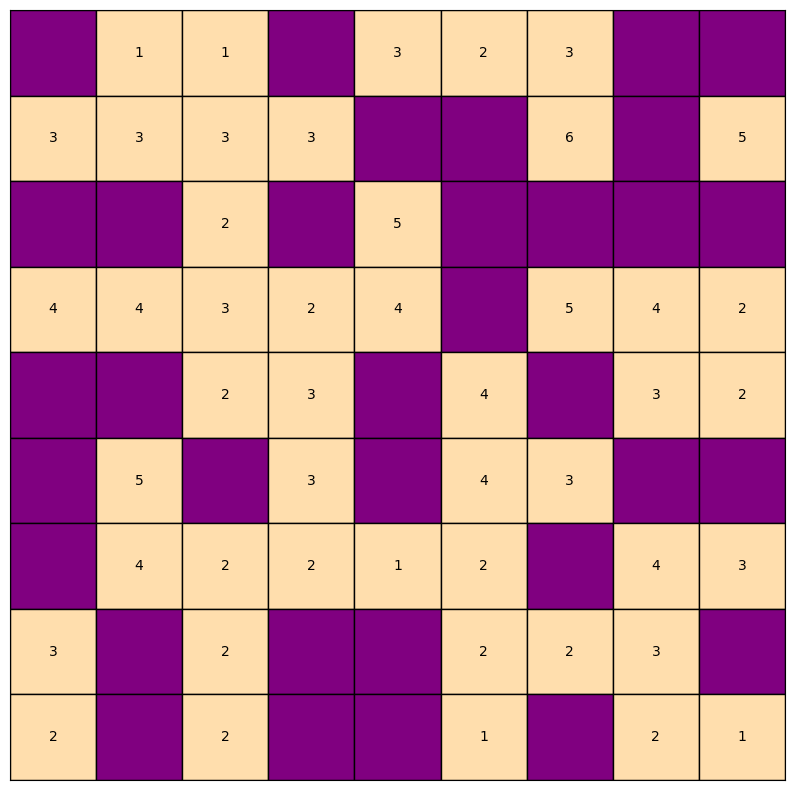

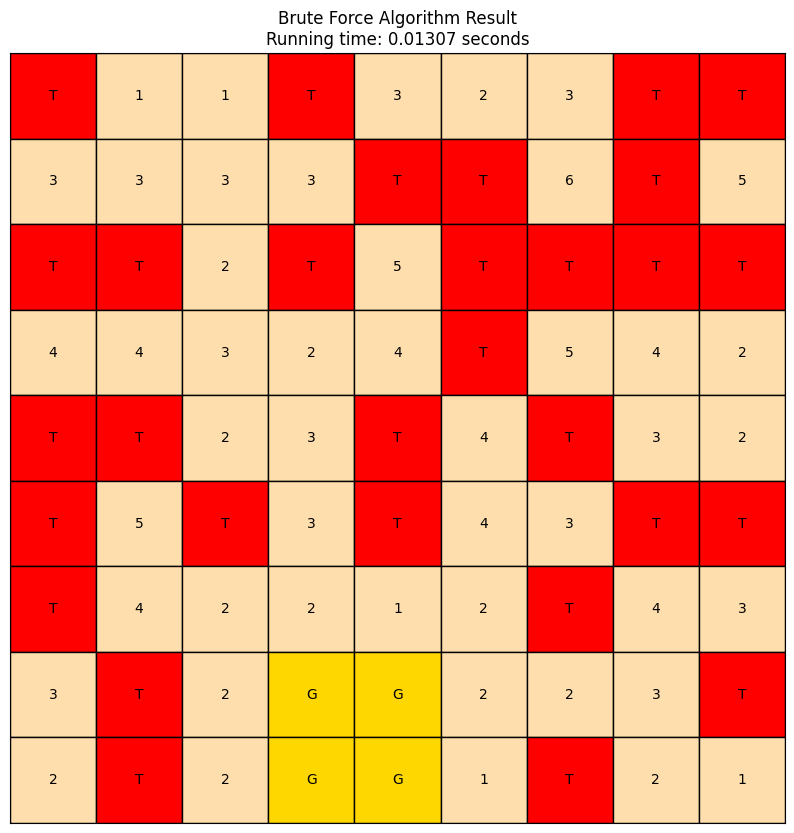

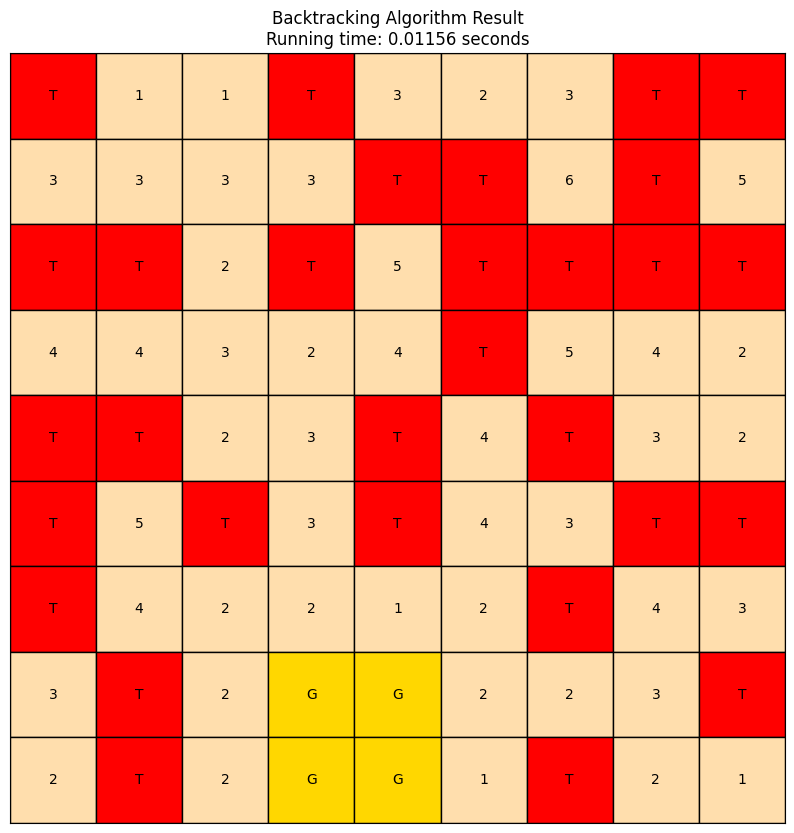

In [105]:
# Main
file_path = "Map/9x9/9x9.txt"
map = Map()
map.readInput(file_path)
map.printMap()

convert_numeric_strings_to_integers(map)
convert_true_to_none(map)

map.printMap()

solve_map_with_brute_force(map)
solve_map_with_backtracking(map)